Programación para *Data Science*
============================

Unidad 8: Visualitzación de datos en Python
-----------------------------------------------------

# Introducción

En este Notebook encontraréis dos conjuntos de ejercicios: un primer conjunto de **ejercicios para practicar** y un segundo conjunto de **actividades evaluables** como PEC de la asignatura.

En cuanto al conjunto de ejercicios para practicar, éstos no puntúan para la PEC, pero os recomendamos que los intentéis resolver como parte del proceso de aprendizaje. Encontraréis ejemplos de posibles soluciones a los ejercicios al propio notebook, pero es importante que intentéis resolverlos vosotros antes de consultar las soluciones. Las soluciones os permitirán validar vuestras respuestas, así como ver alternativas de resolución de las actividades. También os animamos a preguntar cualquier duda que surja sobre la resolución de los **ejercicios para practicar** en el foro del aula.

En relación a las actividades evaluables, veréis que cada una de ellas tiene asociada una puntuación que indica el peso que tiene la actividad sobre la nota de la PEC. Adicionalmente, hay un ejercicio opcional, que no tiene puntuación dentro de la PEC, pero que se valora al final del semestre de cara a conceder las matrículas de honor y redondear las notas finales. Podéis sacar la máxima nota de la PEC sin necesidad de hacer este ejercicio! El objetivo de este ejercicio es que sirva como pequeño reto para los estudiantes que quieran profundizar en el contenido de la asignatura.

Además, veréis que todas las actividades tienen una etiqueta que indica los recursos necesarios para llevarla a cabo. Hay tres posibles etiquetas:

* <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> **Sólo materiales**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura. 

* <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span> **Consulta externa guiada**: la actividad puede requerir hacer uso de herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de dónde o cómo encontrar la información adicional necesaria para resolver la actividad.

* <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> **Consulta externa independente**: la actividad puede requerir hacer uso de herramientas que no se encuentran en los materiales de la asignatura, y el enunciado puede no incluir la descripción de dónde o cómo encontrar esta información adicional. Será necesario que el estudiante busque esta información utilizando los recursos que se han explicado en la asignatura.

Es importante notar que estas etiquetas no indican el nivel de dificultad del ejercicio, sino únicamente la necesidad de consulta de documentación externa para su resolución. Además, recordad que las **etiquetas son informativas**, pero podréis consultar referencias externas en cualquier momento (aunque no se indique explícitamente) o puede ser que podáis hacer una actividad sin consultar ningún tipo de documentación. Por ejemplo, para resolver una actividad que sólo requiera los materiales de la asignatura, puedéis consultar referencias externas si queréis, ya sea tanto para ayudaros en la resolución como para ampliar el conocimiento!

En cuanto a la consulta de documentación externa en la resolución de los ejercicios, recordad **citar siempre la bibliografía utilizada** para resolver cada actividad.

---

#### Alumno: Nicolas D'Alessandro

---

## Ejercicios para la PEC

A continuación encontraréis los **ejercicios y preguntas teóricas que debe completar en esta PEC** y que forman parte de la evaluación de esta unidad.

### Ejercicio 1

Pokemon es una saga RPG muy famosa a nivel mundial. La misión de estos juegos es capturar y entrenar a los pokemon, unas criaturas que habitan en todo el continente, para hacerse con el título de maestro de la liga Pokemon. Los Pokemons son criaturas muy diversas, hay muchos tipos diferentes y algunos de ellos pueden evolucionar.

En este ejercicio exploraremos los Pokemons de la primera generación con el dataset `pokemon.csv`. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> 


1. ¿Cuántos Pokemons legendarios hay? Cuántos Pokemons hay de cada tipo de evolución (_variable Stage_)?

2. ¿Cuál es el tipo más frecuente? Y el menos?

3. Un nuevo entrenador tiene que escoger entre 3 Pokemons iniciales (Bulbasaur, Charmander y Squirtle) y nos ha pedido que le ayudemos a decidir basándonos en las estadísticas de los pokemons de estos tres tipos (Grass, Fire y Water) . Si nos centramos sólo en las características de ataque y defensa, qué tipo deberíamos recomendar?

**Representa las respuestas gráficamente.**

Pista: podéis utilizar la función jointplot que hemos visto en el Notebook de teoría. Considerad qué tipo de gráfica, de entre las que ofrece jointplot, se ajusta a los requerimientos del enunciado.

**(2.5 puntos)**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path = r'/home/datasci/Desktop/Módulo 8/data/'

In [7]:
df = pd.read_csv('Pokemon.csv', encoding = 'utf-8')

In [8]:
df.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


#### Respuesta 1

,Legendary,Number
0,False,147
1,True,4


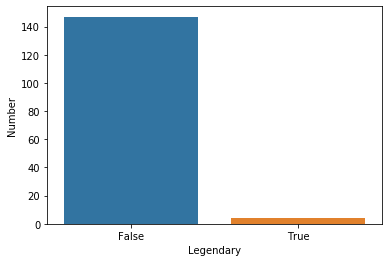

In [11]:
#OPCIÓN 1 - BAR PLOT
groupe1 = df.groupby('Legendary').agg({'Number':'count'}).reset_index()
g=sns.barplot(x='Legendary',y='Number',data=groupe1)
groupe1

,Stage,Number
0,1,79
1,2,56
2,3,16


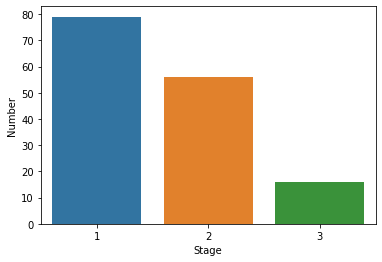

In [15]:
groupe2 = df.groupby('Stage').agg({'Number':'count'}).reset_index()
g=sns.barplot(x='Stage',y='Number',data=groupe2)
groupe2

In [16]:
#OPCIÓN 2 - Creamos la función para realizar un gráfico circular
def make_pie_plot(labels,sizes,title=False):
    
    #definimos los pie chart colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    
    #explsion
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    
    #dibujamos el círculo
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.tight_layout()
    if title !=False:
        plt.title(title)
    plt.show()

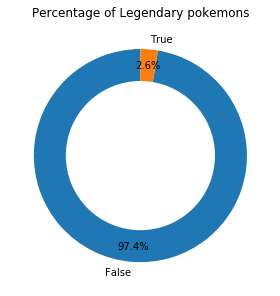

In [34]:
#aplicamos la función creada
make_pie_plot(groupe1.Legendary.values,groupe1.Number.values,title = 'Percentage of Legendary pokemons')

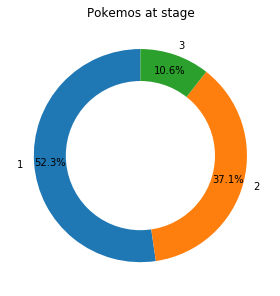

In [35]:
#aplicamos la función creada
make_pie_plot(groupe2.Stage.values,groupe2.Number.values,title= 'Pokemos at stage')

In [36]:
print('Existen {} pokemon legendarios.'.format(df[df['Legendary'] == True].shape[0]))

Existen 4 pokemon legendarios.


#### Respuesta 2

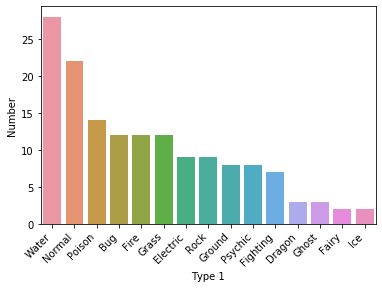

,Type 1,Number
0,Water,28
1,Normal,22
2,Poison,14
3,Bug,12
4,Fire,12
5,Grass,12
6,Electric,9
7,Rock,9
8,Ground,8
9,Psychic,8


In [37]:
#OPCIÓN 1 - BAR PLOT
groupe3 = df.groupby('Type 1').agg({'Number':'count'}).reset_index()
groupe3 = groupe3.sort_values('Number', ascending = False).reset_index(drop=True)
g=sns.barplot(x='Type 1',y='Number',data=groupe3)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
groupe3

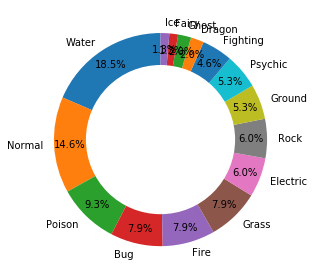

In [38]:
#OPCIÓN 2 - Gráfico Circular
g = make_pie_plot(groupe3['Type 1'].values,groupe3.Number.values)

In [39]:
print('El tipo con mayor frecuencia es "{}" y el de menor frecuencia "{}"'.format(
    groupe3.loc[0,'Type 1'], groupe3.loc[len(groupe3.index)-1,'Type 1']))

El tipo con mayor frecuencia es "Water" y el de menor frecuencia "Ice"


#### Respuesta 3

In [40]:
df[df['Name'].isin(['Bulbasaur', 'Charmander','Squirtle'])]

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [41]:
top3 = df[df['Name'].isin(['Bulbasaur', 'Charmander','Squirtle'])].copy()

Si nos centramos sólo en las características de ataque y defensa ¿qué tipo deberíamos recomendar?

**RESPUESTA:**

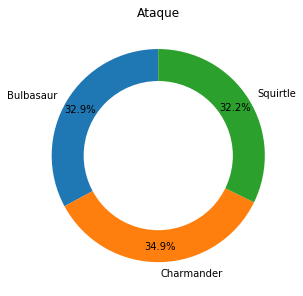

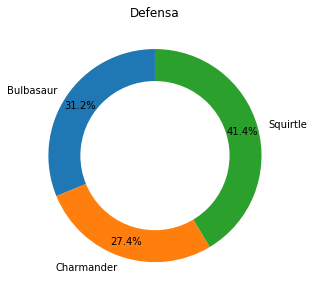

In [42]:
make_pie_plot(top3.Name.values,top3.Attack.values,title = 'Ataque')
make_pie_plot(top3.Name.values,top3.Defense.values,title = 'Defensa')

Para evaluar correctamente que Pokemon elegir basandonos solamente en defensa y ataque creamos la variable **Calidad**:

\begin{equation*}
Calidad = Defensa + Ataque
\end{equation*}

In [44]:
top3['Calidad'] = top3['Defense']+top3['Attack']

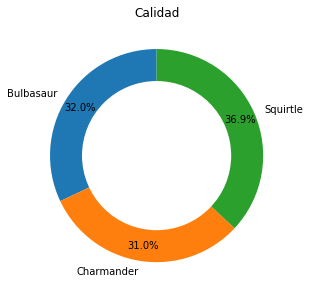

In [45]:
make_pie_plot(top3.Name.values,top3.Calidad.values,title = 'Calidad')

Hemos definido el indicador 'Calidad'. El pokemon con mejor calidad es Squirtle

In [52]:
top3.sort_values('Calidad',ascending=False).reset_index()

,index,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,Calidad
0,6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,113
1,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,98
2,3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,95


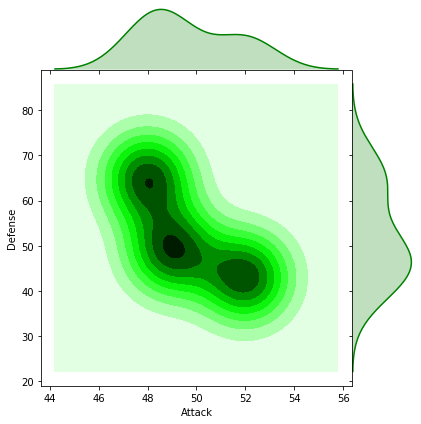

In [49]:
#para finalizar, visualizamos el joinplot
sns.jointplot(x=top3.Attack,y=top3.Defense,kind="kde", space=0, color="g")
plt.show()

### Exercici 2

La ciudad de Barcelona está realizando un estudio para ampliar las áreas verdes de la ciudad. Es por ello que el ayuntamiento de Barcelona requiere de nuestro servicio para construir un mapa **interactivo** que muestre los puntos donde hay árboles y palmeras en la ciudad.

Nos piden crear un mapa utilizando la librería _geoplotlib_ que nos debe permitir ver la localización de cada árbol/palmera. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

Nota 1: Puede obtener los datos del arbolado de zona de la ciudad de Barcelona en el portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/data/es/dataset) y [cargar los datos](https://github.com/andrea-cuttone/geoplotlib/wiki/user-Guide#loading-data) a partir de un diccionario o un dataframe. Sino también puede cargar el conjunto de datos `arbrat_zona.csv` **(que os proporcionamos junto con el enunciado de la PEC)**.

Nota 2: Es importante que los tipos diferentes de zonas (arbol o palmera) tengan distinto color en el mapa.

**(2.5 puntos)**

In [53]:
#importamos la librería necesaria
import pandas as pd

In [54]:
data = pd.read_csv('arbrat_zona.csv', encoding = 'utf-8')
data = data.rename(columns={'LATITUD_WGS84':'lat', 'LONGITUD_WGS84':'lon' })
data = data.drop(columns=['X_ETRS89', 'Y_ETRS89'])

In [57]:
#creamos el dataset para palmeras
data1 = data[data['TIPUS_ELEMENT'] == 'PALMERA ZONA']
data1.head(2)

,CODI,lat,lon,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,NOM_CIENTIFIC,NOM_CASTELLA,...,CATEGORIA_ARBRAT,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL
0,0000002AR,41.438986,2.165807,PALMERA ZONA,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 449",PETITA,1155,Chamaerops humilis,Palmito,...,PRIMERA,NaN,NaN,NaN,ASPERSIÓ,GESPA,PARTERRE,NaN,NaN,NaN
1,0000008AR,41.438498,2.165526,PALMERA ZONA,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 441",MITJANA,636,Yucca gigantea,Yuca pie de elefante,...,SEGONA,NaN,NaN,NaN,ASPERSIÓ,GESPA,PARTERRE,NaN,NaN,NaN


In [58]:
#creamos el dataset para arboles
data2 = data[data['TIPUS_ELEMENT'] == 'ARBRE ZONA']
data2.head(2)

,CODI,lat,lon,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,NOM_CIENTIFIC,NOM_CASTELLA,...,CATEGORIA_ARBRAT,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL
4,0001140AR,41.435473,2.167947,ARBRE ZONA,"Central de Nou Barris, Parc","Pg Urrutia, 70",GRAN,563,Tipuana tipu,Palo rosa; tipa blanca,...,SEGONA,NaN,NaN,NaN,DIFUSIÓ,GESPA,PARTERRE,NaN,NaN,NaN
5,0001141AR,41.435502,2.167965,ARBRE ZONA,"Central de Nou Barris, Parc","Pl César Vallejo, 1",GRAN,563,Tipuana tipu,Palo rosa; tipa blanca,...,SEGONA,NaN,NaN,NaN,DIFUSIÓ,GESPA,PARTERRE,NaN,NaN,NaN


In [53]:
#importamos la librería necesaria
import geoplotlib

#utilizamos los datasets generados anteriormente
data1 = geoplotlib.utils.DataAccessObject.from_dataframe(data)
data2 = geoplotlib.utils.DataAccessObject.from_dataframe(data2)

# Mostramos los puntos del fichero utilizando un color diferente para cada
geoplotlib.dot(data1, color='b', point_size=5.75)
geoplotlib.dot(data2, color='g', point_size=2.75)

# Mostramos el mapa dentro del notebook.
geoplotlib.inline()

#NOTA PARA EL PROFESOR: Para realizar el mapa interactivo, solo debemos cambiar la forma de visualización 
#(lo dejo comentado porque se me cuelga la máquina virtual al querer utilizarlo)

#geoplotlib.show()

### Ejercicio 3

Teniendo en cuenta los datos obtenidos en el ejercicio anterior, el ayuntamiento de Barcelona también nos pide llevar a cabo un análisis descriptivo de los árboles. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> 

1. ¿Cuántos árboles y cuántas palmeras han plantado cada año? **Ver resultados separados para cada grupo (árbol y palmera).**

2. Adicionalmente, se nos pide generar una gráfica que muestre la **distribución** de los meses en los que se han plantado árboles y palmeras en los últimos 3 años (de 2017 2019).

Nota 1: La columna con la información de la fecha de plantación tiene missing. Por lo tanto, se deben seleccionar sólo aquellas filas con este dato.

Nota 2: Para obtener la información del mes y año a partir de la fecha, puede utilizar la función _DatetimeIndex_ de la librería pandas.

Nota 3: La visualización de los datos debería ser atractiva y clara a fin de que los responsables del ayuntamiento puedan sacar conclusiones de ellas.


**(2.5 puntos)**

In [59]:
#cargamos el dataset nuevamente
df = pd.read_csv('arbrat_zona.csv', encoding = 'utf-8')

In [62]:
#creamos la función para el preprocessing
def cleanUp_columns(data):
    '''
    This function map column names with values in lowercase and low_uderscore instead of spaces if apply.
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: None
    '''
    data.rename(columns= {column: column.lower().replace(' ', '_') for column in data.columns.tolist()},
                inplace = True)

In [60]:
#aplicamos las funciones para explorar nuestro dataset

In [58]:
cleanUp_columns(df)
df.columns

Index(['codi', 'x_etrs89', 'y_etrs89', 'latitud_wgs84', 'longitud_wgs84',
       'tipus_element', 'espai_verd', 'adreca', 'alcada', 'cat_especie_id',
       'nom_cientific', 'nom_castella', 'nom_catala', 'categoria_arbrat',
       'amplada_vorera', 'data_plantacio', 'tipus_aigua', 'tipus_reg',
       'tipus_superficie', 'tipus_suport', 'cobertura_escocell',
       'mida_escocell', 'vora_escocell'],
      dtype='object')

In [59]:
#chequeamos valores nulos en nuestro dataset

def nullvaluesf_count(data):
    '''
    This function displays the features that contains null values as well as the correspondig count:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Features with null values and count.
    '''
    print('Features with null values:')
    null_values = {}
    for i in data.columns[data.isnull().any()]:
        null_values[i] = data.shape[0] - data.loc[:, i].count()
        
    return null_values

In [60]:
nullvaluesf_count(df)

Features with null values:


{'espai_verd': 4921,
 'alcada': 3910,
 'nom_castella': 788,
 'nom_catala': 856,
 'categoria_arbrat': 1357,
 'amplada_vorera': 38081,
 'data_plantacio': 44864,
 'tipus_aigua': 45671,
 'tipus_reg': 5,
 'tipus_superficie': 4030,
 'tipus_suport': 4513,
 'cobertura_escocell': 16477,
 'mida_escocell': 37936,
 'vora_escocell': 15196}

In [61]:
#Como explica el enunciado "La columna con la información de la fecha de plantación tiene missing" 
#Filtraremos nuestro df con sólo aquellas filas que contengan este dato.
df = df[df['data_plantacio'].isna() == False].reset_index()

In [62]:
#comprobamos que no haya valores nulos
df['data_plantacio'].isna().any()

False

In [63]:
#convertimos a DateTime la columna 'data_plantacio'
df['data_plantacio'] = pd.to_datetime(df['data_plantacio'])

In [64]:
#comprobamos los "dtypes" de nuestro dataset
df['data_plantacio'].dtypes

dtype('<M8[ns]')

In [65]:
#creamos la columna 'año_plantacio' y 'mes_plantacio' para las graficas necesarias
df['año_plantacio'] = df['data_plantacio'].dt.strftime('%Y')
df['mes_plantacio'] = df['data_plantacio'].dt.strftime('%Y-%m')
df = df.drop(columns='index')
df.head()

,codi,x_etrs89,y_etrs89,latitud_wgs84,longitud_wgs84,tipus_element,espai_verd,adreca,alcada,cat_especie_id,...,data_plantacio,tipus_aigua,tipus_reg,tipus_superficie,tipus_suport,cobertura_escocell,mida_escocell,vora_escocell,año_plantacio,mes_plantacio
0,0001447AR,430659.343,4587642.599,41.437362,2.170005,ARBRE ZONA,"Can Ensenya, Pl.","Pl Ca n'Ensenya, 0",PETITA,694,...,2014-02-27,NaN,MÀNEGA,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA,2014,2014-02
1,0003994AR,428131.618,4581590.548,41.382631,2.140471,ARBRE ZONA,"Màlaga, Jardins de (Robrenyo)","Jard Màlaga, 0",PETITA,563,...,2012-06-14,NaN,MÀNEGA,PAVIMENT,ESCOCELL QUADRAT,SENSE COBERTURA,ENTRE 60 I 100 cm,NaN,2012,2012-06
2,0003995AR,428120.969,4581585.162,41.382582,2.140344,ARBRE ZONA,"Màlaga, Jardins de (Robrenyo)","Jard Màlaga, 0",PETITA,563,...,2012-06-14,NaN,MÀNEGA,PAVIMENT,ESCOCELL QUADRAT,SENSE COBERTURA,ENTRE 60 I 100 cm,NaN,2012,2012-06
3,0003996AR,428110.240,4581579.855,41.382533,2.140217,ARBRE ZONA,"Màlaga, Jardins de (Robrenyo)","Jard Màlaga, 0",PETITA,563,...,2012-06-14,NaN,MÀNEGA,PAVIMENT,ESCOCELL QUADRAT,SENSE COBERTURA,ENTRE 60 I 100 cm,NaN,2012,2012-06
4,0004046AR,428115.618,4581582.501,41.382557,2.140281,ARBRE ZONA,"Màlaga, Jardins de (Robrenyo)","Jard Màlaga, 0",PETITA,563,...,2012-06-14,NaN,MÀNEGA,PAVIMENT,ESCOCELL QUADRAT,SENSE COBERTURA,ENTRE 60 I 100 cm,NaN,2012,2012-06


In [66]:
#creamos una función para graficar la respuesta 1

def answer1(df): 
    #filtramos los datos solicitados en el enunciado
    table1 = df[df['tipus_element'] ==
                'ARBRE ZONA'].groupby('año_plantacio').agg({'tipus_element':'count'}).reset_index()
    table2 = df[df['tipus_element'] == 
                'PALMERA ZONA'].groupby('año_plantacio').agg({'tipus_element':'count'}).reset_index()
    table1 = table1.rename(columns = {'tipus_element': 'arbre'})
    table2 = table2.rename(columns = {'tipus_element': 'palmera'})

    #unimos las agrupaciones
    filtered = pd.merge(table1,
                     table2,
                     on='año_plantacio', 
                     how='outer')

    filtered.fillna(0, inplace = True)

    filtered['palmera'] = filtered['palmera'].astype(int)

    #finalmente obtenemos el dataframe necesario para realizar el ejercicio y graficamos
    f=  plt.subplots(2, 1, figsize=(15, 10) , sharex='col', sharey='row')
    display(filtered)

    plt.subplot(2, 1, 1)
    plt.title('Árboles plantados por año en Barcelona', fontsize=18)
    plt.bar(x='año_plantacio', height='arbre', width=0.8, color= 'g', data=filtered)
    plt.xticks(fontsize=14, color= 'g')

    plt.subplot(2, 1, 2)
    plt.title('Palmeras plantadas por año en Barcelona', fontsize=18)
    plt.bar(x='año_plantacio', height='palmera', width=0.8, color='b', data=filtered)
    plt.xticks(fontsize=14, color= 'b')
    
    return plt.show()

,año_plantacio,arbre,palmera
0,2007,30,0
1,2008,9,3
2,2009,118,6
3,2010,472,2
4,2011,281,13
5,2012,98,0
6,2013,203,0
7,2014,365,3
8,2015,49,0
9,2016,288,2


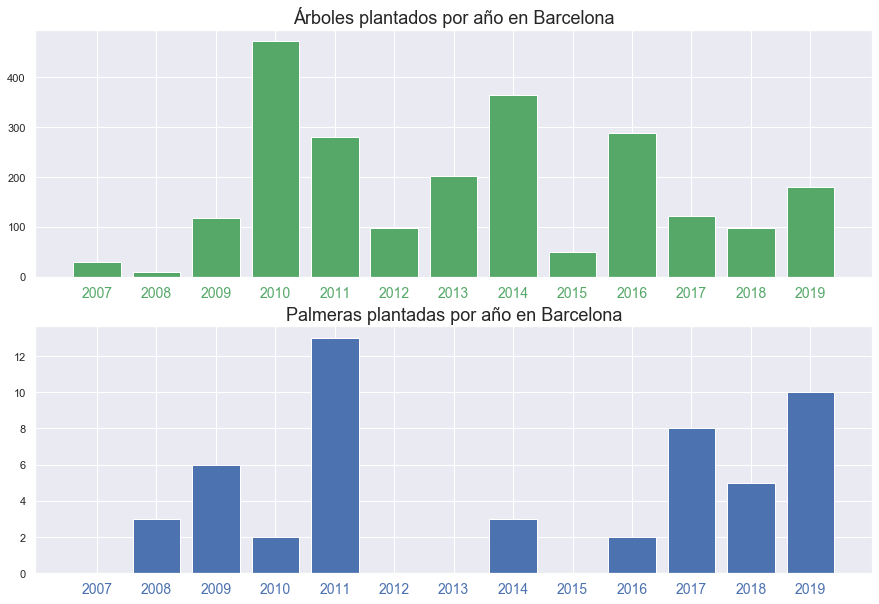

In [67]:
answer1(df)

In [63]:
#creamos una función para graficar la respuesta 2

def answer2(df): 
    
    #filtramos los datos solicitados en el enunciado
    
    df = df[df['año_plantacio'].isin(['2017', '2018', '2019'])]
    
    table1 = df[df['tipus_element'] ==
                'ARBRE ZONA'].groupby('mes_plantacio').agg({'tipus_element':'count'}).reset_index()
    table2 = df[df['tipus_element'] == 
                'PALMERA ZONA'].groupby('mes_plantacio').agg({'tipus_element':'count'}).reset_index()
    table1 = table1.rename(columns = {'tipus_element': 'arbre'})
    table2 = table2.rename(columns = {'tipus_element': 'palmera'})

    #unimos las agrupaciones
    filtered = pd.merge(table1,
                     table2,
                     on= 'mes_plantacio',
                     how='outer')

    filtered.fillna(0, inplace = True)

    filtered['palmera'] = filtered['palmera'].astype(int)
    filtered['arbre'] = filtered['arbre'].astype(int)
    filtered = filtered.sort_values('mes_plantacio')

    #finalmente obtenemos el dataframe necesario para realizar el ejercicio y graficamos
    
    sns.set()
    f, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)
    plt.suptitle('Distribución de plantación de árboles y palmeras en los años 2017 a 2019')
    g1 = sns.barplot(x="mes_plantacio", y="arbre", data=filtered, color= 'g', ax=ax[0])
    g2 = sns.barplot(x="mes_plantacio", y="palmera", data=filtered, color= 'b', ax=ax[1])
    g2.set_xticklabels(filtered['mes_plantacio'], rotation=45)
    plt.show()
    
    return  display(filtered)

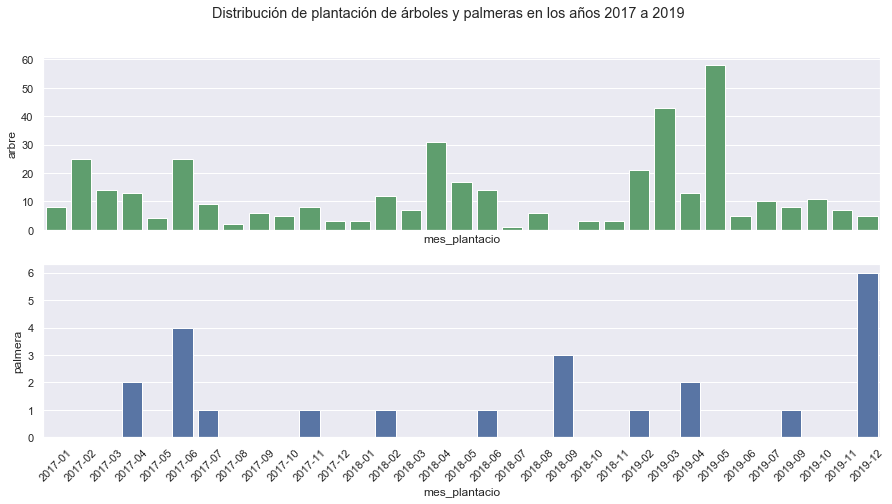

,mes_plantacio,arbre,palmera
0,2017-01,8,0
1,2017-02,25,0
2,2017-03,14,0
3,2017-04,13,2
4,2017-05,4,0
5,2017-06,25,4
6,2017-07,9,1
7,2017-08,2,0
8,2017-09,6,0
9,2017-10,5,0


In [93]:
answer2(df)

### Ejercicio 4

Juego de Tronos es conocida por las complicadas interacciones entre sus personajes. En este ejercicio trabajaremos con el conjunto de datos `book1.csv` que constituye una red de las relaciones entre los personajes del primer libro de _Juego de Tronos_. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

Cada fila representa un link entre 2 personajes (Source y Target) y el valor (Weight) indica el número de veces que han interaccionado.

1. Representad gráficamente el grafo y pintad de diferente color cada comunidad detectada.

2. Cuál es el personaje más importante del primer libro de Juego de Tronos?

Nota: La importancia de un nodo dentro de una red se mide con el número de nodos a los que está conectado. Esta característica se conoce con el nombre de **degree_centrality**. Podéis ver este [link](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) para más información:

**(2.5 puntos)**

In [64]:
# Datos disponibles para el ejercicio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 

# Cargamos los datos del fichero book1.csv en un dataframe
book1 = pd.read_csv('book1.csv')

# Creamos un objeto grafo vacío
G_book1 = nx.Graph()

# Iteramos para todas las filas del dataset
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


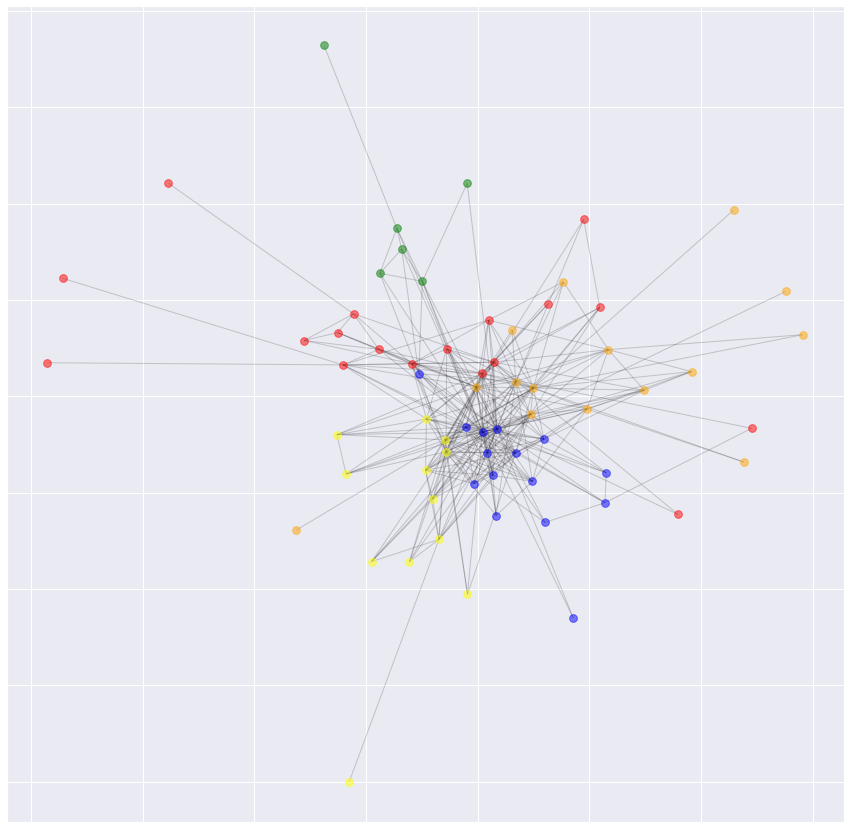

In [86]:
# Importamos la librería de detección de comunidades.
import community
from community import best_partition

# Generamos una nueva figura.
plt.figure(1, figsize=(15, 15))

# Calculamos las posiciones de los nodos del grafo en el plano con el algoritmo # spring.
graph_pos = nx.spring_layout(G_book1)

# Detectamos las comunidades existentes en el grafo.
partition = community.best_partition(G_book1)
# Definimos los colores que utilizaremos para los nodos.
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta'] 
# Para cada comunidad detectada, mostramos los nodos:

for count, com in enumerate(set(partition.values())):
    
    # Seleccionamos los nodos de la comunidad que estamos procesando.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    # Mostramos los nodos, coloreados según la comunidad a la que pertenecen.
    nx.draw_networkx_nodes(G_book1, graph_pos, list_nodes, node_size = 60,
    node_color = colors[count], alpha = 0.5)
    
# Mostramos las aristas del grafo, especificando la posición, 
# el color y la transparencia.
nx.draw_networkx_edges(G_book1, graph_pos, edge_color='k', alpha=0.2)

# Mostramos las etiquetas, indicando la fuente y el tamaño.
#a = nx.draw_networkx_labels(G_book1, graph_pos, font_size=8, font_family='sans-serif')

In [69]:
#importamos el modulo necesario para el calculo
from networkx.algorithms.centrality import degree_centrality

In [65]:
#creamos la función para encontrar el personaje más importante del libro
def mostImportantC(book):
    d = degree_centrality(book)
    v = max(d.values())
    print("El personaje más importante del libro de Juego de Tronos es: {}".format(
        list(d.keys())[list(d.values()).index(v)]))

In [102]:
#aplicamos la función creada
mostImportantC(G_book1)

El personaje más importante del libro de Juego de Tronos es: Robert-Baratheon


### Ejercicio Opcional

Mediante la _degree centrality_ hemos podido descubrir cuál es el personaje más importante del primer libro de _Juego de Tronos_. Sin embargo, esta saga consta de cinco volúmenes, por lo tanto, tiene sentido que la importancia de los personajes cambie a lo largo de los cinco libros.

En este ejercicio estudiaremos la evolución de los personajes mediante la red de relaciones de los cinco libros. Trabajaremos con los conjuntos de datos `book1.csv`,` book2.csv`, `book3.csv`,` book4.csv` y `book5.csv` **(que os proporcionamos junto con el enunciado de la PEC)**. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

- ¿Cuál es el personaje más importante de cada libro?
- Muestra gráficamente cómo varía la importancia de Eddard Stark, Arya Stark, Tyrion Lannister, Jon Snow y Cersei Lannister en cada libro.

In [70]:
#redefinimos la función para calcular el personaje más importante en cada libro
def mostImportantC(data):
      
    book = pd.read_csv(data)
    
    # Creamos un objeto grafo vacío 
    G_book = nx.Graph()

    # Iteramos para todas las filas del dataset
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
        
    d = degree_centrality(G_book)
    v = max(d.values())
    print("El personaje más importante del libro de Juego de Tronos es: {}".format(
        list(d.keys())[list(d.values()).index(v)]))

In [71]:
mostImportantC('book1.csv')

El personaje más importante del libro de Juego de Tronos es: Robert-Baratheon


In [106]:
mostImportantC('book2.csv')

El personaje más importante del libro de Juego de Tronos es: Tyrion-Lannister


In [105]:
mostImportantC('book3.csv')

El personaje más importante del libro de Juego de Tronos es: Tyrion-Lannister


In [107]:
mostImportantC('book4.csv')

El personaje más importante del libro de Juego de Tronos es: Jaime-Lannister


In [108]:
mostImportantC('book5.csv')

El personaje más importante del libro de Juego de Tronos es: Jon-Snow


___